# Modelos Multiplos Preditivos - Cap. 8
## 0 - Bibliotecas importadas

In [35]:
import pandas as pd
import numpy as np

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);






|nº| Atributo            | SI | Observação |
|---|---------------------|----|------------|
|01.| __Acidez fixa:__ | (g/dm³)| Formado pela acidez orgânica da uva (tartático) e da fermentação alcoólica.| 
|02.| __Acidez volátil:__ | (g/dm³) | Produzidos pelas reações químicas durante a maturação do vinho (Ácido Acético). A acidez volátil é um indicador da qualidade do vinho.| 
|03.| __Ácido cítrico:__ | (g/dm³) | Um dos ácidos orgânicos da uva.| 
|04.| __Açúcar residual:__ | (g/dm³)  | - | 
|05.| __Cloretos:__ | (g/dm³) | Cloreto de sódio | 
|06.| __Dióxido de enxofre livre:__  | (mg/dm³) | - | 
|07.| __Dióxido de enxofre total:__  | (mg/dm³) | - | 
|08.| __Densidade:__  | (g/cm³) | - | 
|09.| __pH:__ | [0,14] | - | 
|10.| __Sulfatos:__ | (g/dm³) | Sulfato de potássio | 
|11.| __Álcool:__ | - | - | 
|12.| __Qualidade:__ | (vol.%) | - |







### Vinho Branco

In [96]:
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
print("Quantidade amostra = ",df_white['quality'].count())
df_white.head(n=1)


Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [97]:
pd.options.display.float_format = "{:.2f}".format
df_white.describe(percentiles=[])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


Text(0, 0.5, 'Frequência')

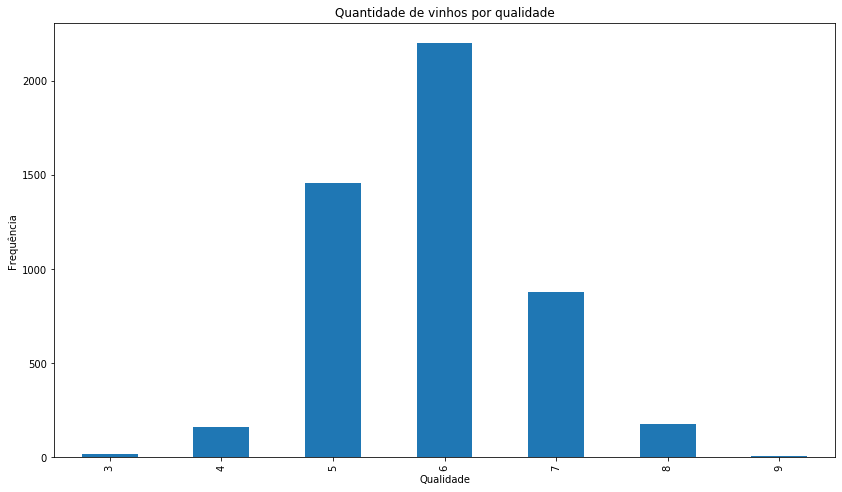

In [37]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## 2 - Pré-Processamento

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Agrupando Classes - 2 Classes

In [99]:
classes_2 = []
for i in df_white['quality']:
    if i >= 0 and i <= 5:
        classes_2.append('1')
    elif i >= 6 and i <= 10:
        classes_2.append('2')
df_white['classes_2'] = classes_2  

### Agrupando Classes - 3 Classes

In [100]:
classes_3 = []
for i in df_white['quality']:
    if i >= 0 and i <= 3:
        classes_3.append('1')
    elif i >= 4 and i <= 6:
        classes_3.append('2')
    elif i >= 7 and i <= 10:
        classes_3.append('3')
df_white['classes_3'] = classes_3  
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes_2,classes_3
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2,3


### StandardScale
> class sklearn.preprocessing.StandardScaler(**copy**=True, **with_mean**=True, **with_std**=True)

In [80]:
ss = StandardScaler()
df_white_scaler = ss.fit_transform(df_white.values.reshape(-1,1))
df_white_scaler = df_white_scaler.inverse_transform()
df_white_scaler

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

## 3 - Treinamento

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df_white.iloc[:,:11]
y = df_white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

### Bagging
>class sklearn.ensemble.BaggingClassifier(**base_estimator**=None, **n_estimators**=10, **max_samples**=1.0, **max_features**=1.0, **bootstrap**=True, **bootstrap_features**=False, **oob_score**=False, **warm_start**=False, **n_jobs**=None, **random_state**=None, **verbose**=0)

In [66]:
from sklearn.ensemble import BaggingClassifier
k_range = [10,20,30,40,50,60,70,80,90, 100]
bc_list_predict = []
for k in k_range:
        
    bc = BaggingClassifier( n_estimators = k,
                            random_state = 1
                          )
    bc.fit(X_train,y_train)
    bc_list_predict.append(bc.predict(X_test))

### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
k_range = [None,2,3,4,5,6,7,8,9,10]
dtc_list_predict = []
for k in k_range :
    dtc = DecisionTreeClassifier(max_depth = k,
                                random_state = 1 )
    dtc.fit(X_train,y_train)
    dtc_list_predict.append(dtc.predict(X_test))

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)


In [58]:
from sklearn.ensemble import RandomForestClassifier
k_range = [100,200,300,400,500,600,700,800,900,1000]
rfc_list_predict = []
for k in k_range:
    rfc = RandomForestClassifier(n_estimators= k,
                                  max_features= 'auto',     
                                  bootstrap = 'TRUE',
                                  n_jobs = -1, 
                                  random_state = 1  )
    rfc.fit(X_train,y_train)
    rfc_list_predict.append(rfc.predict(X_test))

## 4 - Avaliação

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
metrics = [[[],[],[],[]], [[],[],[],[]], [[],[],[],[]]]

### Bagging

In [83]:
for i in range(0,len(bc_list_predict)):
    metrics[0][0].append(accuracy_score(y_test, bc_list_predict[i]))
    metrics[0][1].append(precision_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][2].append(recall_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][3].append(f1_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))


### Decision Tree

In [84]:
for i in range(0,len(dtc_list_predict)):
    metrics[1][0].append(accuracy_score(y_test, dtc_list_predict[i]))
    metrics[1][1].append(precision_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][2].append(recall_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][3].append(f1_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))


### Random Forest

In [85]:
for i in range(0,len(rfc_list_predict)):
    metrics[2][0].append(accuracy_score(y_test, rfc_list_predict[i]))
    metrics[2][1].append(precision_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[2][2].append(recall_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[2][3].append(f1_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))



### Plot

In [86]:
import matplotlib.pyplot as plt 
labels = ["Bagging", "Decision Tree", "Random Forest"]

max_metrics = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
min_metrics = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [98]:
labels = ["Bagging", "Decision Tree", "Random Forest"]
metric = ["Acurácia", "Precisão", "Recall", "F1"]
max_metrics = [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
min_metrics = [[2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0]]

for i in range(len(labels)):
    for l in range(0,len(rfc_list_predict)):
        for k in range(0,4):
            if (max_metrics[i][k] < metrics[i][k][l]):
                max_metrics[i][k] = metrics[i][k][l]
            if (min_metrics[i][k] > metrics[i][k][l]):
                min_metrics[i][k] = metrics[i][k][l]

for i in range(len(labels)):
    for k in range(0,4):
        print("Matriz de confusão do", labels[i], "com a(o) maior(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(max_metrics[i][k])])
        print(rfc_conf_matrix)
        print("Matriz de confusão do", labels[i], "com a(o) menor(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(min_metrics[i][k])])
        print(rfc_conf_matrix)

Matriz de confusão do Bagging com a(o) maior(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0   5 241 120   2   0]
 [  0   0  71 446  27   0]
 [  0   0   5  98 129   1]
 [  0   0   1  14  12  14]]
Matriz de confusão do Bagging com a(o) menor(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Bagging com a(o) maior(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0   5 241 120   2   0]
 [  0   0  71 446  27   0]
 [  0   0   5  98 129   1]
 [  0   0   1  14  12  14]]
Matriz de confusão do Bagging com a(o) menor(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Bagging com a(o) maior(o)  Recall
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0 

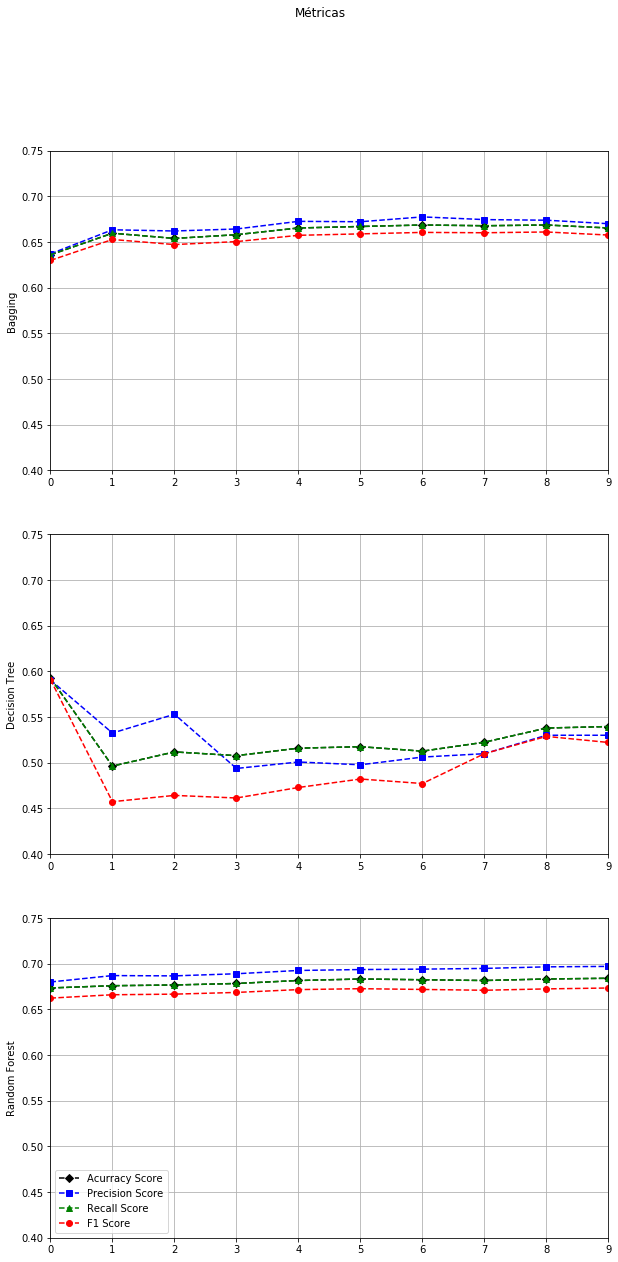

In [102]:

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 20]

for i in range(len(labels)):
    plt.subplot(311+i)
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][0], 'kD--', label = "Acurracy Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][1], 'bs--', label = "Precision Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][2], 'g^--', label = "Recall Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][3], 'ro--', label = "F1 Score")
    plt.axis([0, len(k_range)-1, 0.4, 0.75])
    plt.ylabel(labels[i])
    plt.grid("on")
plt.legend()
plt.suptitle("Métricas")
plt.show()


# ------------------------Extra ---------------------------

## GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [80,100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100,300,500,1000]
}
rfc = RandomForestClassifier()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X_train, y_train)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 10.7min finished


Melhores parametros = 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}

Melhor pontuação: 
 0.6297281134676093


In [79]:
feature_importantes = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)

                      importance
alcohol                 0.147488
density                 0.108546
volatile acidity        0.107219
free sulfur dioxide     0.097163
total sulfur dioxide    0.085378
residual sugar          0.081563
chlorides               0.079020
pH                      0.079014
citric acid             0.076298
sulphates               0.069550
fixed acidity           0.068760
